**Classifying, if an image contains a specific image**
* An object of either pizza or steak

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import zipfile

In [2]:
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

In [3]:
zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')
zip_ref.extractall()
zip_ref.close()

In [7]:
import os

# Get the file paths lk('pizza_steak'):
for dirnames,  filenames, dirpath in os.walk('pizza_steak'):
    print(f"There are {len(dirnames)} directories and {len(filenames)} image(s) in {dirpath}. ")


There are 11 directories and 2 image(s) in []. 
There are 16 directories and 2 image(s) in []. 
There are 22 directories and 0 image(s) in ['1001116.jpg', '1032754.jpg', '103708.jpg', '1060407.jpg', '106507.jpg', '1067986.jpg', '1106738.jpg', '1119571.jpg', '11297.jpg', '1152100.jpg', '1179703.jpg', '1180001.jpg', '1180273.jpg', '1183595.jpg', '1202689.jpg', '121960.jpg', '1220156.jpg', '1223284.jpg', '1226346.jpg', '1228171.jpg', '124815.jpg', '1265335.jpg', '1275885.jpg', '1280320.jpg', '129666.jpg', '1315645.jpg', '1342321.jpg', '1380247.jpg', '138961.jpg', '1398213.jpg', '139952.jpg', '139987.jpg', '140016.jpg', '1412011.jpg', '1445608.jpg', '144631.jpg', '1459760.jpg', '1475479.jpg', '1484836.jpg', '148765.jpg', '1503858.jpg', '1506213.jpg', '1507019.jpg', '1512557.jpg', '153195.jpg', '1555015.jpg', '1594097.jpg', '1618659.jpg', '1636919.jpg', '1655630.jpg', '1686938.jpg', '1687143.jpg', '1691503.jpg', '1694874.jpg', '1765727.jpg', '177513.jpg', '1843754.jpg', '1895182.jpg', '1925

In [8]:
num_pizza_train = len(os.listdir('pizza_steak/train/pizza'))
num_steak_train = len(os.listdir('pizza_steak/train/steak'))

num_pizza_train, num_steak_train

(750, 750)

In [9]:
import pathlib

dir_names = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted(item.name for item in dir_names.glob("*")))
class_names

array(['pizza', 'steak'], dtype='<U5')

In [10]:
# visualize the images
import matplotlib.image as mpimg
import random

In [11]:
def view_image(target_dir, target_class):
    target_folder = target_dir + target_class

    # picking a random image path
    random_image= random.sample(os.listdir(target_folder),1)
    print(random_image)

    # read_image
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off")

    print(f"image shape:{img.shape}")
    return img

['857888.jpg']
image shape:(512, 384, 3)


array([[[100, 106, 120],
        [101, 107, 121],
        [101, 107, 123],
        ...,
        [ 83,  87,  98],
        [ 83,  87,  98],
        [ 83,  87,  98]],

       [[101, 107, 121],
        [101, 107, 121],
        [102, 108, 124],
        ...,
        [ 83,  87,  96],
        [ 83,  87,  98],
        [ 82,  86,  95]],

       [[102, 108, 122],
        [102, 108, 122],
        [102, 108, 124],
        ...,
        [ 80,  85,  91],
        [ 80,  84,  93],
        [ 79,  84,  90]],

       ...,

       [[112, 124, 146],
        [113, 125, 147],
        [115, 128, 147],
        ...,
        [109, 115, 113],
        [105, 111, 109],
        [ 99, 105, 103]],

       [[113, 125, 147],
        [113, 125, 147],
        [114, 126, 148],
        ...,
        [107, 112, 108],
        [103, 108, 104],
        [102, 107, 103]],

       [[114, 126, 148],
        [114, 126, 148],
        [113, 125, 147],
        ...,
        [102, 107, 103],
        [100, 105, 101],
        [103, 108, 104]]

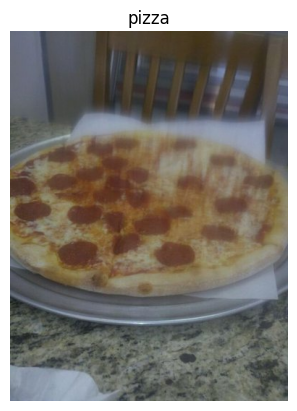

In [12]:
img = view_image("pizza_steak/train/", "pizza")
img

* Going to perform Feature Scaling and
  * load the image
  * preprocess the image 
* Build a cnn architecture for the data
  * define the model
  * compile it
  * fit the model   

In [13]:
# load the data
from tensorflow.keras.preprocessing.image import  ImageDataGenerator
tf.random.set_seed(42)

train_gen = ImageDataGenerator(rescale=1./225)
test_gen = ImageDataGenerator(rescale=1./225)

train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

train_data = train_gen.flow_from_directory(train_dir,
                                           target_size=(224,224),
                                           batch_size=32,
                                           class_mode = 'binary',
                                           seed = 42
                                         )

test_data = train_gen.flow_from_directory(test_dir,
                                          target_size=(224,224),
                                          batch_size=32,
                                          class_mode='binary',
                                          seed = 42
                                        )



model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(10, (3,3), input_shape=(224,224,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(10, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2), 2, padding='valid'))

model.add(tf.keras.layers.Conv2D(10, (3,3), activation='relu'))
model.add(tf.keras.layers.Conv2D(10, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPool2D((2,2), 2, padding='valid'))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(1, activation='softmax'))


# compile the model
model.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)


# fit the model
model.fit(train_data,
          steps_per_epoch = len(train_data),
          epochs = 15,
          validation_data = test_data)
          # validation_steps = len(test_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(
c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 388ms/step - accuracy: 0.4948 - loss: 0.6467 - val_accuracy: 0.5000 - val_loss: 0.4728
Epoch 2/15


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 50ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.4728
Epoch 3/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 18s 370ms/step - accuracy: 0.4971 - loss: 0.4673 - val_accuracy: 0.5000 - val_loss: 0.3938
Epoch 4/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.3938
Epoch 5/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 411ms/step - accuracy: 0.5163 - loss: 0.3874 - val_accuracy: 0.5000 - val_loss: 0.3177
Epoch 6/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.3177
Epoch 7/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 403ms/step - accuracy: 0.4861 - loss: 0.3632 - val_accuracy: 0.5000 - val_loss: 0.3634
Epoch 8/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.3634
Epoch 9/15
47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 396ms/step - accuracy: 0.5084 - loss: 0.33

In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

In [16]:
train_data[0]

(array([[[[0.52444446, 0.5466667 , 0.30666667],
          [0.5466667 , 0.5644445 , 0.3377778 ],
          [0.50666666, 0.51555556, 0.29333335],
          ...,
          [0.09777778, 0.20888889, 0.22666667],
          [0.11555555, 0.23111111, 0.23555556],
          [0.11555555, 0.23111111, 0.21777779]],
 
         [[0.3288889 , 0.36      , 0.12888889],
          [0.36888888, 0.3866667 , 0.16      ],
          [0.4888889 , 0.4888889 , 0.26666668],
          ...,
          [0.14666668, 0.24000001, 0.25333333],
          [0.12888889, 0.22222222, 0.22666667],
          [0.12444445, 0.23555556, 0.21777779]],
 
         [[0.76      , 0.7911111 , 0.5511111 ],
          [0.5866667 , 0.6088889 , 0.36      ],
          [0.60444444, 0.6088889 , 0.35555556],
          ...,
          [0.1688889 , 0.24000001, 0.23555556],
          [0.14222223, 0.22666667, 0.21777779],
          [0.14666668, 0.23111111, 0.20444445]],
 
         ...,
 
         [[0.6844445 , 0.73777777, 0.51555556],
          [0.68444

In [12]:
model_2 = tf.keras.Sequential()
model_2.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model_2.add(tf.keras.layers.Dense(10, activation='relu'))
model_2.add(tf.keras.layers.Dense(10, activation='relu'))
model_2.add(tf.keras.layers.Dense(10, activation='relu'))
model_2.add(tf.keras.layers.Dense(1, activation='softmax'))

model_2.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

model_2.fit(train_data,
          steps_per_epoch = len(train_data),
          epochs = 5,
          validation_data = test_data,
          )

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 19s 158ms/step - accuracy: 0.4791 - loss: 4.3653 - val_accuracy: 0.5000 - val_loss: 0.8263
Epoch 2/5


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 33ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.8263
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 142ms/step - accuracy: 0.5069 - loss: 0.8469 - val_accuracy: 0.5000 - val_loss: 0.5188
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5188
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 143ms/step - accuracy: 0.4998 - loss: 0.4829 - val_accuracy: 0.5000 - val_loss: 0.8120


In [17]:
model_3 = tf.keras.Sequential()
model_3.add(tf.keras.layers.Flatten(input_shape=(224,224,3)))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(100, activation='relu'))
model_3.add(tf.keras.layers.Dense(1, activation='softmax'))

model_3.compile(
    loss = 'binary_crossentropy',
    optimizer = tf.keras.optimizers.Adam(0.001),
    metrics = ['accuracy']
)

history = model_3.fit(train_data,
          steps_per_epoch = len(train_data),
          epochs = 5,
          validation_data = test_data,
          )

c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/5


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\ops\nn.py:545: UserWarning: You are using a softmax over axis -1 of a tensor of shape (None, 1). This axis has size 1. The softmax operation will always return the value 1, which is likely not what you intended. Did you mean to use a sigmoid instead?
  warnings.warn(


47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 261ms/step - accuracy: 0.5036 - loss: 7.2857 - val_accuracy: 0.5000 - val_loss: 1.0743
Epoch 2/5


c:\Users\Phavour\AppData\Local\Programs\Python\Python312\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 1.0743
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 254ms/step - accuracy: 0.5163 - loss: 0.6564 - val_accuracy: 0.5000 - val_loss: 0.5545
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5000 - val_loss: 0.5545
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 13s 255ms/step - accuracy: 0.4957 - loss: 0.5194 - val_accuracy: 0.5000 - val_loss: 1.0709
